# Congress Committee Assignments

Text

Source: https://theunitedstates.io/

Source for Scraper of Committee Assignments: https://github.com/unitedstates/congress-legislators/blob/main/scripts/committee_membership.py

Committee Assignments: https://github.com/unitedstates/congress/wiki/committee-meetings

----

##### Imports

In [1]:
import pandas as pd
from plotnine import *

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('max_seq_item', None)

In [3]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('explore')
require('tidyr')
require('forcats')
require('knitr')
require('ragg')
require('palmerpenguins')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2

R[write to console]: Loading required package: explore

R[write to console]: Loading required package: tidyr

R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:reshape2’:

    smiths


R[write to console]: Loading required package: forcats

R[write to console]: Loading required package: knitr

R[write to console]: Loading required package: r

In [7]:
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,9,35
1,44,30
2,37,9
3,94,85
4,37,90


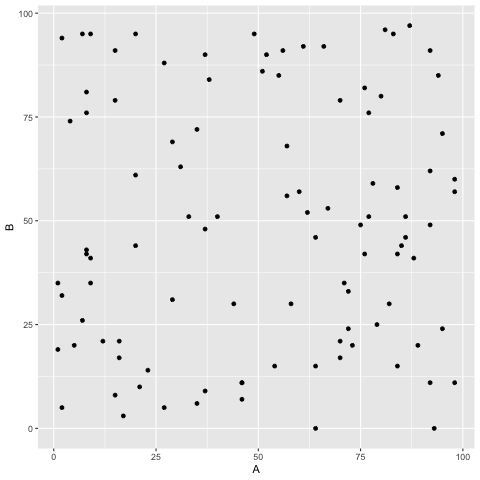

In [8]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

In [9]:
import re, lxml.html, lxml.etree
from collections import OrderedDict
import utils

In [10]:
from python_utils.import_ import import_global

In [11]:
# from utils import download, load_data, save_data

In [12]:
import yaml
import pandas as pd

In [13]:
import requests

In [14]:
# pip install us

In [15]:
import us

----

### Reading in JSON Files

##### Committee Membership Current

In [16]:
url = f"https://theunitedstates.io/congress-legislators/committee-membership-current.json"
response = requests.get(url)
data_committee_membership_current = response.json()

{'SSAF': [{'name': 'Debbie Stabenow',
   'party': 'majority',
   'rank': 1,
   'title': 'Chairman',
   'bioguide': 'S000770'},
  {'name': 'Patrick J. Leahy',
   'party': 'majority',
   'rank': 2,
   'bioguide': 'L000174'},
  {'name': 'Sherrod Brown',
   'party': 'majority',
   'rank': 3,
   'bioguide': 'B000944'},
  {'name': 'Amy Klobuchar',
   'party': 'majority',
   'rank': 4,
   'bioguide': 'K000367'},
  {'name': 'Michael F. Bennet',
   'party': 'majority',
   'rank': 5,
   'bioguide': 'B001267'},
  {'name': 'Kirsten E. Gillibrand',
   'party': 'majority',
   'rank': 6,
   'bioguide': 'G000555'},
  {'name': 'Tina Smith',
   'party': 'majority',
   'rank': 7,
   'bioguide': 'S001203'},
  {'name': 'Richard J. Durbin',
   'party': 'majority',
   'rank': 8,
   'bioguide': 'D000563'},
  {'name': 'Cory A. Booker',
   'party': 'majority',
   'rank': 9,
   'bioguide': 'B001288'},
  {'name': 'Ben Ray Luján',
   'party': 'majority',
   'rank': 10,
   'bioguide': 'L000570'},
  {'name': 'Raphael G. Warnock',
   'party': 'majority',
   'rank': 11,
   'bioguide': 'W000790'},
  {'name': 'John Boozman',
   'party': 'minority',
   'rank': 1,
   'title': 'Ranking Member',
   'bioguide': 'B001236'},
  {'name': 'Mitch McConnell',
   'party': 'minority',
   'rank': 2,
   'bioguide': 'M000355'},
  {'name': 'John Hoeven',
   'party': 'minority',
   'rank': 3,
   'bioguide': 'H001061'},
  {'name': 'Joni Ernst',
   'party': 'minority',
   'rank': 4,
   'bioguide': 'E000295'},
  {'name': 'Cindy Hyde-Smith',
   'party': 'minority',
   'rank': 5,
   'bioguide': 'H001079'},
  {'name': 'Roger Marshall',
   'party': 'minority',
   'rank': 6,
   'bioguide': 'M001198'},
  {'name': 'Tommy Tuberville',
   'party': 'minority',
   'rank': 7,
   'bioguide': 'T000278'},
  {'name': 'Chuck Grassley',
   'party': 'minority',
   'rank': 8,
   'bioguide': 'G000386'},
  {'name': 'John Thune',
   'party': 'minority',
   'rank': 9,
   'bioguide': 'T000250'},
  {'name': 'Deb Fischer',
   'party': 'minority',
   'rank': 10,
   'bioguide': 'F000463'},
  {'name': 'Mike Braun',
   'party': 'minority',
   'rank': 11,
   'bioguide': 'B001310'}],
 

In [17]:
# data_committee_membership_current

In [18]:
# data_committee_membership_current.keys()

In [19]:
# data_committee_membership_current.values()

In [20]:
# data_committee_membership_current.items()

----

##### Creating a loop for each committee

In [21]:
ls = []

In [22]:
for key, value in data_committee_membership_current.items():
    for b in value:
        ls.append([key, b['name'], b['party'], b['rank'], b['bioguide']])

In [23]:
# for commmittee, ls_committee_members in data_committee_membership_current.items():
#     for dict_member in ls_committee_members:
#         ls_member_info.append([committee, dict_member['name'], dict_member['party'], dict_member['rank'], dict_member['bioguide']])

In [24]:
ls[0:10]

[['SSAF', 'Debbie Stabenow', 'majority', 1, 'S000770'],
 ['SSAF', 'Patrick J. Leahy', 'majority', 2, 'L000174'],
 ['SSAF', 'Sherrod Brown', 'majority', 3, 'B000944'],
 ['SSAF', 'Amy Klobuchar', 'majority', 4, 'K000367'],
 ['SSAF', 'Michael F. Bennet', 'majority', 5, 'B001267'],
 ['SSAF', 'Kirsten E. Gillibrand', 'majority', 6, 'G000555'],
 ['SSAF', 'Tina Smith', 'majority', 7, 'S001203'],
 ['SSAF', 'Richard J. Durbin', 'majority', 8, 'D000563'],
 ['SSAF', 'Cory A. Booker', 'majority', 9, 'B001288'],
 ['SSAF', 'Ben Ray Luján', 'majority', 10, 'L000570']]

In [25]:
df = pd.DataFrame(ls, columns=['committee', 'name','party','rank', 'bioguide'])

In [26]:
df.head()

,committee,name,party,rank,bioguide
0,SSAF,Debbie Stabenow,majority,1,S000770
1,SSAF,Patrick J. Leahy,majority,2,L000174
2,SSAF,Sherrod Brown,majority,3,B000944
3,SSAF,Amy Klobuchar,majority,4,K000367
4,SSAF,Michael F. Bennet,majority,5,B001267


In [27]:
# df.to_csv('..//data//processed//congress_committees.csv', index = False)

----

##### Merging the Full Committee Names to Dataframe 

Merging a handmade dataset of the full Committee Names Looked up at GovTrack https://www.govtrack.us/congress/committees/

In [28]:
df2 = pd.read_csv('..//data//handmade//congress_committees_info.csv', encoding="utf-8")

In [29]:
len(df)

4004

In [30]:
len(df2)

227

In [31]:
join_df= pd.merge(df, df2, on='committee', how='outer')

In [32]:
len(join_df)

4024

In [33]:
join_df.head()

,committee,name,party,rank,bioguide,committee_fullname
0,SSAF,Debbie Stabenow,majority,1,S000770,"Senate Committee on Agriculture, Nutrition, and Forestry"
1,SSAF,Patrick J. Leahy,majority,2,L000174,"Senate Committee on Agriculture, Nutrition, and Forestry"
2,SSAF,Sherrod Brown,majority,3,B000944,"Senate Committee on Agriculture, Nutrition, and Forestry"
3,SSAF,Amy Klobuchar,majority,4,K000367,"Senate Committee on Agriculture, Nutrition, and Forestry"
4,SSAF,Michael F. Bennet,majority,5,B001267,"Senate Committee on Agriculture, Nutrition, and Forestry"


In [34]:
join_df.tail()

,committee,name,party,rank,bioguide,committee_fullname
4019,HSEF,Kat Cammack,minority,5,C001039,House Select Committee on Economic Disparity and Fairness in Growth
4020,HSEF,Angie Craig,majority,6,C001119,House Select Committee on Economic Disparity and Fairness in Growth
4021,HSEF,Byron Donalds,minority,6,D000032,House Select Committee on Economic Disparity and Fairness in Growth
4022,HSEF,Alexandria Ocasio-Cortez,majority,7,O000172,House Select Committee on Economic Disparity and Fairness in Growth
4023,HSEF,Sara Jacobs,majority,8,J000305,House Select Committee on Economic Disparity and Fairness in Growth


----